IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns
plt.style.use("dark_background")


READING CSV

In [2]:
df=pd.read_csv(r"C:\Users\Preeti\Desktop\train.csv",index_col=0)
df.head()

,category_id,channel_title,subscriber,title,tags,description,Trend_day_count,Tag_count,Trend_tag_count,comment_count,comment_disabled,like dislike disabled,likes,dislike,tag appered in title,views,Unnamed: 17,Unnamed: 18
Video_id,,,,,,,,,,,,,,,,,,
HDR9SQc79,22,CaseyNeistat,9086142.0,WE WANT TO TALK ABOUT OUR MARRIAGE,SHANtell martin,SHANTELL'S CHANNEL - https://www.youtube.com/s...,6.0,21,6,,FALSE,FALSE,13342,6089,False,1978978,NaN,NaN
KNH52UF?48,24,LastWeekTonight,5937292.0,The Trump Presidency: Last Week Tonight with J...,last week tonight trump presidency|last week t...,"One year after the presidential election, John...",1.0,23,1,116266,TRUE,FALSE,5761,3044,False,1487870,NaN,NaN
QTW28IRG36,23,Rudy Mancuso,4191209.0,"Racist Superman | Rudy Mancuso, King Bach & Le...",racist superman|rudy|mancuso|king|bach|racist|...,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,10.0,22,3,257850,TRUE,TRUE,0,0,True,1502102,NaN,NaN
MGL76WI]26,24,Good Mythical Morning,13186408.0,Nickelback Lyrics: Real or Fake?,rhett and link|gmm|good mythical morning|rhett...,Today we find out if Link is a Nickelback amat...,12.0,17,5,263939,TRUE,TRUE,0,0,True,3519302,NaN,NaN
TWP93KXT70,24,nigahiga,20563106.0,I Dare You: GOING BALD!?,ryan|higa|higatv|nigahiga|i dare you|idy|rhpc|...,I know it's been a while since we did this sho...,11.0,15,7,268085,TRUE,TRUE,0,0,True,4835374,NaN,NaN


DATA PREPARATION AND CLEANING

In [3]:
#CHECK THE SHAPE
df.shape

(3198, 18)

In [4]:
#CHECK THE COLUMNS
df.columns

Index(['category_id', 'channel_title', 'subscriber', 'title', 'tags',
       'description', 'Trend_day_count', 'Tag_count', 'Trend_tag_count',
       'comment_count', 'comment_disabled', 'like dislike disabled', 'likes',
       'dislike', 'tag appered in title', 'views', 'Unnamed: 17',
       'Unnamed: 18'],
      dtype='object')

CHECK THE NUMERICAL DATA

In [5]:
df.describe()

,subscriber,Trend_day_count,Unnamed: 17
count,3.175000e+03,3197.000000,1.0
mean,3.823981e+06,7.964342,2544.0
std,2.865771e+07,78.556055,NaN
min,0.000000e+00,0.000000,2544.0
25%,2.428800e+05,4.000000,2544.0
50%,1.241220e+06,7.000000,2544.0
75%,3.812622e+06,10.000000,2544.0
max,1.576229e+09,4444.000000,2544.0


In [6]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numdf = df.select_dtypes(include=numerics)
len(numdf.columns)

3

CHECK THE NULL VALUES

In [7]:
df.isnull().sum()

category_id                 6
channel_title               3
subscriber                 23
title                       3
tags                      152
description                65
Trend_day_count             1
Tag_count                   1
Trend_tag_count             1
comment_count               0
comment_disabled            0
like dislike disabled       0
likes                       0
dislike                     0
tag appered in title        1
views                       0
Unnamed: 17              3197
Unnamed: 18              3197
dtype: int64

In [8]:
missing_percentage=df.isna().sum().sort_values(ascending=False)/len(df)
missing_percentage

Unnamed: 18              0.999687
Unnamed: 17              0.999687
tags                     0.047530
description              0.020325
subscriber               0.007192
category_id              0.001876
channel_title            0.000938
title                    0.000938
Trend_day_count          0.000313
Tag_count                0.000313
Trend_tag_count          0.000313
tag appered in title     0.000313
comment_disabled         0.000000
like dislike disabled    0.000000
likes                    0.000000
dislike                  0.000000
views                    0.000000
comment_count            0.000000
dtype: float64

<AxesSubplot:>

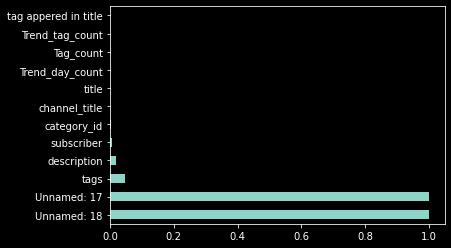

In [9]:
missing_percentage[missing_percentage!=0].plot(kind='barh')

REMOVING THE UNUSED COLUMN

In [10]:
df.drop(columns=['Unnamed: 17','Unnamed: 18'],inplace=True) 
df.head(3)

,category_id,channel_title,subscriber,title,tags,description,Trend_day_count,Tag_count,Trend_tag_count,comment_count,comment_disabled,like dislike disabled,likes,dislike,tag appered in title,views
Video_id,,,,,,,,,,,,,,,,
HDR9SQc79,22,CaseyNeistat,9086142.0,WE WANT TO TALK ABOUT OUR MARRIAGE,SHANtell martin,SHANTELL'S CHANNEL - https://www.youtube.com/s...,6.0,21,6,,FALSE,FALSE,13342,6089,False,1978978
KNH52UF?48,24,LastWeekTonight,5937292.0,The Trump Presidency: Last Week Tonight with J...,last week tonight trump presidency|last week t...,"One year after the presidential election, John...",1.0,23,1,116266,TRUE,FALSE,5761,3044,False,1487870
QTW28IRG36,23,Rudy Mancuso,4191209.0,"Racist Superman | Rudy Mancuso, King Bach & Le...",racist superman|rudy|mancuso|king|bach|racist|...,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,10.0,22,3,257850,TRUE,TRUE,0,0,True,1502102


FILLING NULL VALUES

In [11]:
df=df.fillna(0)

In [12]:
df.isnull().sum()

category_id              0
channel_title            0
subscriber               0
title                    0
tags                     0
description              0
Trend_day_count          0
Tag_count                0
Trend_tag_count          0
comment_count            0
comment_disabled         0
like dislike disabled    0
likes                    0
dislike                  0
tag appered in title     0
views                    0
dtype: int64

CHECKING THE DATA TYPE

In [13]:
df.dtypes

category_id               object
channel_title             object
subscriber               float64
title                     object
tags                      object
description               object
Trend_day_count          float64
Tag_count                 object
Trend_tag_count           object
comment_count             object
comment_disabled          object
like dislike disabled     object
likes                     object
dislike                   object
tag appered in title      object
views                     object
dtype: object

RENAMING THE COLUMN

In [14]:
df.rename(columns={'Video_id':'V_id','category_id':'Cat_id','channel_title':'Ch_Title','subscriber': 'SubCbr','title':'V_Title','description':'Desc','comment_count':'Cmt_ct','likes':'Likes','dislike':'Dislikes','views':'Views','tags':'Tags','comment_disabled':'com_dis','like dislike disabled':'L/DL_Dis','tag appeared in title':'Tag_Title'},inplace=True)

In [15]:
df[:3]

,Cat_id,Ch_Title,SubCbr,V_Title,Tags,Desc,Trend_day_count,Tag_count,Trend_tag_count,Cmt_ct,com_dis,L/DL_Dis,Likes,Dislikes,tag appered in title,Views
Video_id,,,,,,,,,,,,,,,,
HDR9SQc79,22,CaseyNeistat,9086142.0,WE WANT TO TALK ABOUT OUR MARRIAGE,SHANtell martin,SHANTELL'S CHANNEL - https://www.youtube.com/s...,6.0,21,6,,FALSE,FALSE,13342,6089,False,1978978
KNH52UF?48,24,LastWeekTonight,5937292.0,The Trump Presidency: Last Week Tonight with J...,last week tonight trump presidency|last week t...,"One year after the presidential election, John...",1.0,23,1,116266,TRUE,FALSE,5761,3044,False,1487870
QTW28IRG36,23,Rudy Mancuso,4191209.0,"Racist Superman | Rudy Mancuso, King Bach & Le...",racist superman|rudy|mancuso|king|bach|racist|...,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,10.0,22,3,257850,TRUE,TRUE,0,0,True,1502102


CHECKING UNIQUE VALUES

In [16]:
df.nunique()

Cat_id                    18
Ch_Title                1502
SubCbr                  1452
V_Title                 3192
Tags                    2947
Desc                    3098
Trend_day_count           14
Tag_count                 23
Trend_tag_count           11
Cmt_ct                  2174
com_dis                    3
L/DL_Dis                   3
Likes                   2210
Dislikes                2155
tag appered in title       2
Views                   3194
dtype: int64

RELATIONSHIP ANALYSIS

In [17]:
correlation=df.corr()

<AxesSubplot:>

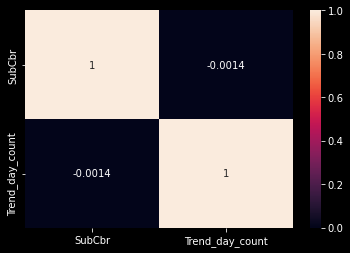

In [18]:
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True)

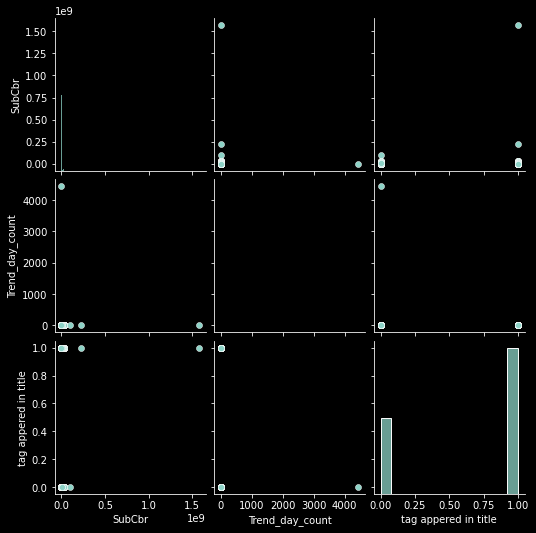

In [19]:
sns.pairplot(df)

TOP 10 LIKED VIDEO

In [20]:
M_likes=df.sort_values(by=['Likes'],ascending=[False],kind='mergesort')


In [21]:
Most_liked=pd.DataFrame(M_likes,columns=['V_Title','Cat_id','Likes'])
Most_liked.reset_index(drop=True,inplace=True)
Most_liked.iloc[1:11]


,V_Title,Cat_id,Likes
1,BEST MAKEUP OF 2017!,26,9983
2,Why Is Jerusalem a Controversial Capital?,25,9974
3,Animal Adventure Park Giraffe Cam,15,9959
4,Luke Bryan - Out Of Nowhere Girl (Audio),10,9956
5,Roy Moore & Jeff Sessions Cold Open - SNL,24,9951
6,[MV] Samuel(사무엘) _ Candy(캔디),10,9941
7,Sarah Jessica Parker Finally Gets Asked To Prom,24,9940
8,YOUTUBER QUIZ + TRUTH OR DARE W/ THE MERRELL T...,22,9911
9,"Model Aircraft Styled 3D Printed Air Engine, E...",28,9901
10,Jimmy Kimmel Returns with Baby Billy After Hea...,23,9899


In [22]:
Most_liked.dtypes

V_Title    object
Cat_id     object
Likes      object
dtype: object

TOP 10 DISLIKED VIDEO

In [23]:
M_Dlikes=df.sort_values(by=['Dislikes'],ascending=[False],kind='mergesort')
Most_Dliked=pd.DataFrame(M_Dlikes,columns=['V_Title','Cat_id','Dislikes'])
Most_Dliked.reset_index(drop=True,inplace=True)
Most_Dliked.iloc[1:11]

,V_Title,Cat_id,Dislikes
1,Country Music Hall of Famer Mel Tillis has died,25,9999
2,"Marbles, Magnets, and Music (Synchronized)",24,9972
3,DOG TRIES TO WAKE UP SLEEPING PIG,15,9972
4,Alex Williams - Prize-winning Designer of the...,28,9968
5,Green Light - Cyanide & Happiness Minis,23,996
6,The Pink Hair Transformation We're Obsessed Wi...,26,996
7,Christina Aguilera - Whitney Houston Tribute (...,10,9948
8,Jenga Wizard - 980027,23,9948
9,You're not crazy. Apple is slowing down older ...,43,9944
10,Koala Brawl : Koalas Fight on Australian Road ...,24,9943


TOP 10 VIEWED VIDEO

In [85]:
df.Views

Video_id
HDR9SQc79     1978978
KNH52UF?48    1487870
QTW28IRG36    1502102
MGL76WI]26    3519302
TWP93KXT70    4835374
               ...   
OKR48DOE67     747960
QJK69DS?91     200410
VHF51NVr11     244022
XHU22OAJ39     907340
IFD79NSG47     465531
Name: Views, Length: 3198, dtype: object

In [92]:
df.Views.nunique()


3194

In [87]:
df.Views.value_counts()

858323     2
932496     2
879028     2
684854     2
1978978    1
          ..
931150     1
879743     1
164863     1
2760338    1
465531     1
Name: Views, Length: 3194, dtype: int64

In [24]:
M_Views=df.sort_values(by=['Views'],ascending=[False],kind='mergesort')
Most_Viewed=pd.DataFrame(M_Views,columns=['V_Title','Cat_id','Views'])
Most_Viewed.reset_index(drop=True,inplace=True)
Most_Viewed.iloc[1:11]

,V_Title,Cat_id,Views
1,Ed Sheeran & Anne-Marie - Fairytale Of New Yor...,10,998005
2,OUR SECRET FAN FICTIONS?! - Truth Bombs #2!,20,995080
3,Casey Neistat Melts His Face Off While Eating ...,26,994115
4,What's In Madison Beer's Bag | Spill It | Refi...,26,991804
5,TODRICK RETURNS TO BROADWAY,24,991799
6,ATTEMPTING EVERY 2017 TREND,24,991739
7,I Got Transformed Into Zendaya | Beauty Evolut...,26,990279
8,Nick Andopolis: Drummer,1,989873537
9,"Raw: 3 South Carolina Deputies, 1 Officer Shot",25,987232
10,Alabama senate election: New poll shows Doug J...,25,986645


TOP 10 CHANNEL 

In [25]:
M_ch=df.sort_values(by=['SubCbr'],ascending=[False],kind='mergesort')
Top_ch=pd.DataFrame(M_ch,columns=['Ch_Title','Views','SubCbr'])
Top_ch.drop_duplicates(subset='Ch_Title',keep='first',inplace=True)
Top_ch.reset_index(drop=True,inplace=True)
Top_ch.iloc[1:11]

,Ch_Title,Views,SubCbr
1,TMZ,1227410,222786000.0
2,Boldly,2387285,99230156.0
3,Ed Sheeran,6339354,28676937.0
4,Dude Perfect,6184137,27998379.0
5,TaylorSwiftVEVO,6016357,27907431.0
6,YouTube Spotlight,5534788,27221198.0
7,KatyPerryVEVO,5867549,26735363.0
8,EminemVEVO,6068848,26383080.0
9,TheEllenShow,5447693,23760020.0
10,WWE,4818957,23182596.0


TOP 10 TRENDING VIDEO

In [26]:
t_V=df.sort_values(by=['Trend_day_count'],ascending=[False],kind='mergesort')
Trend_count=pd.DataFrame(t_V,columns=['Ch_Title','Views','Trend_day_count','V_Title'])
Trend_count.reset_index(inplace=True)
Trend_count.iloc[1:11]

,Video_id,Ch_Title,Views,Trend_day_count,V_Title
1,MGL76WI]26,Good Mythical Morning,3519302,12.0,Nickelback Lyrics: Real or Fake?
2,ZUW72GLK1,FaeryInLoveInc,989873537,12.0,Nick Andopolis: Drummer
3,NVK72MP]8,officer401,578042,12.0,What's Inside a Detectives Car?
4,HHB96CGF16,Screen Junkies,2178128,12.0,TL
5,YEO48IMc76,BBC News,1070097,12.0,Iraq-Iran earthquake: Deadly tremor hits borde...
6,BQT13ZPm60,NBA Highlights · YouTube,606420,12.0,Stephon Marbury and Jimmer Fredette fight in C...
7,AMP35BDV62,D3sports.com,970937,12.0,Heidelberg's nifty hook-and-lateral to the lef...
8,EIZ97XOi35,GEazyMusicVEVO,1842245,12.0,G-Eazy - The Plan (Official Video)
9,MZC20JIC35,IISuperwomanII,3469689,12.0,When Someone Has A Crush on You | Lilly Singh
10,GGE98DEb16,Hopeless Records,456720,12.0,Neck Deep - Parachute (Official Music Video)
